# Agent Analysis Notebook

**Task:** 
Use machine learning to create a model that predicts the specie  using pycaret. Generate all the charts and summaries you think are useful to understand the solution.

The data is available in the 'data/' subdirectory of the current working directory.
List files in 'data/' first to see what's available.


**Generated:** 2026-01-02 15:28:12

**Agent Type:** Planner Agent (with dynamic task planning)

*This notebook was automatically cleaned: imports consolidated, failed cells removed.*

---



## Setup & Imports


In [1]:
from pathlib import Path
import os

from matplotlib.patches import Patch
from pycaret.classification import *
from pycaret.classification import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shutil


## Analysis


### List files in the data/ directory to identify available datasets


In [4]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# List files in the data directory
data_dir = Path('../data/')
print("Files in data/ directory:")
print("=" * 50)

if data_dir.exists():
    files = list(data_dir.glob('*'))
    if files:
        for file in files:
            file_size = file.stat().st_size / 1024  # Size in KB
            print(f"📁 {file.name} ({file_size:.2f} KB)")
    else:
        print("No files found in data/ directory")
else:
    print("data/ directory does not exist")


Files in data/ directory:
📁 iris.csv (3.88 KB)


### Load and explore the dataset (shape, columns, data types, missing values)


In [5]:
# Load the iris dataset
df = pd.read_csv('../data/iris.csv')

print("Dataset Overview")
print("=" * 70)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "=" * 70)
print("\nFirst few rows:")
print(df.head(10))
print("\n" + "=" * 70)
print("\nDataset Info:")
print(df.info())
print("\n" + "=" * 70)
print("\nColumn Names:")
print(df.columns.tolist())
print("\n" + "=" * 70)
print("\nData Types:")
print(df.dtypes)
print("\n" + "=" * 70)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "=" * 70)
print("\nBasic Statistics:")
print(df.describe())
print("\n" + "=" * 70)
print("\nTarget Variable (Species) Distribution:")
print(df.iloc[:, -1].value_counts())


Dataset Overview

Dataset Shape: 150 rows × 5 columns


First few rows:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length 

### Perform exploratory data analysis (EDA) with visualizations


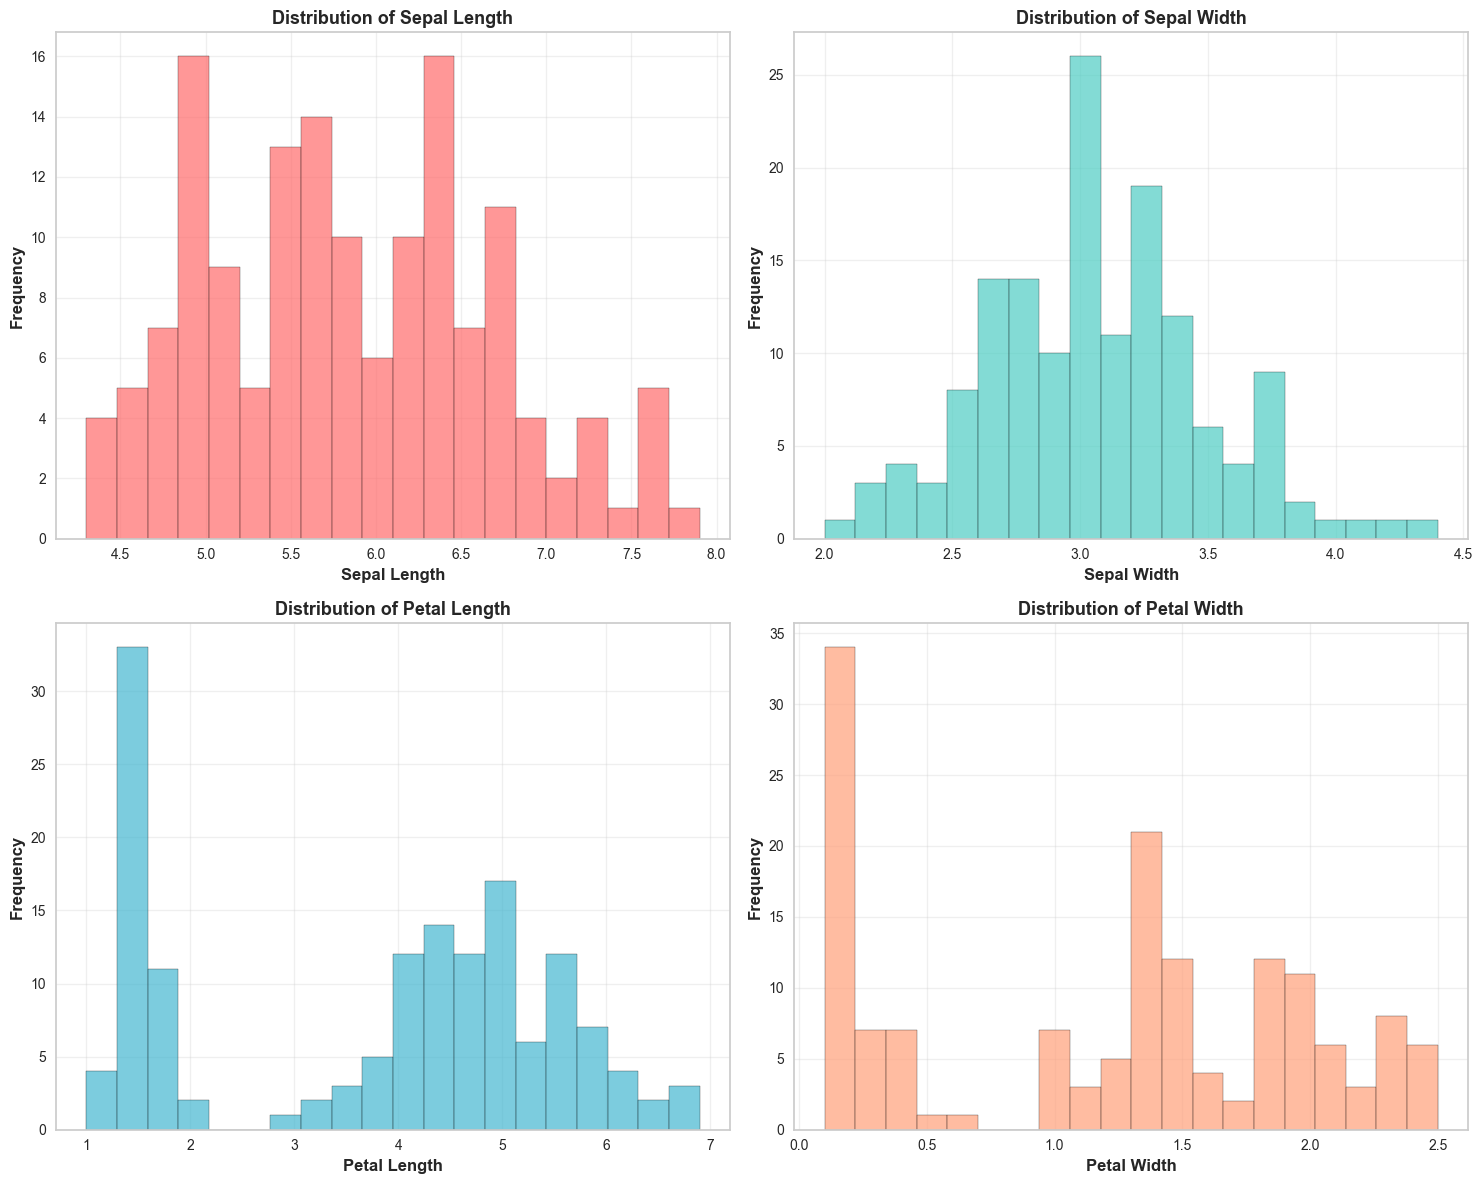

✓ Feature distribution plot saved to artifacts/01_feature_distributions.png


In [7]:
# Create comprehensive EDA visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of each feature
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (feature, color) in enumerate(zip(features, colors)):
    ax = axes[idx // 2, idx % 2]
    ax.hist(df[feature], bins=20, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel(feature.replace('.', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of {feature.replace(".", " ").title()}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../artifacts/01_feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Feature distribution plot saved to artifacts/01_feature_distributions.png")


### Perform exploratory data analysis (EDA) with visualizations


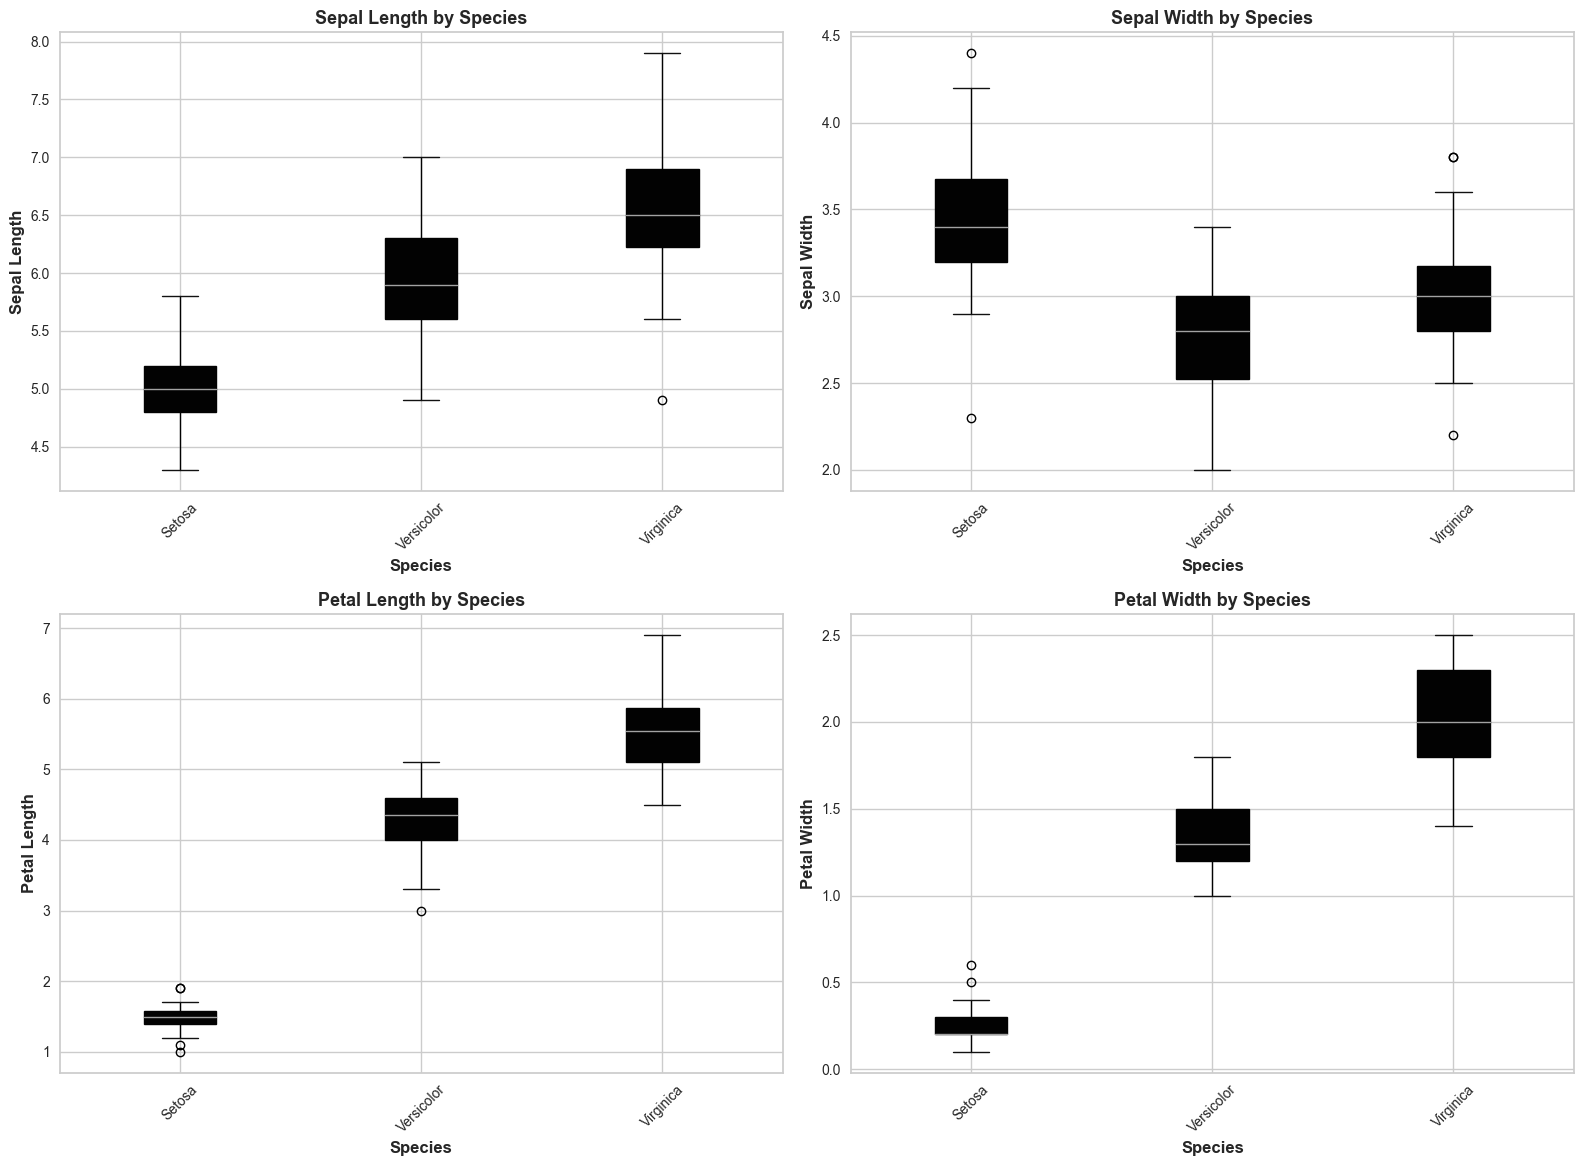

✓ Box plots by species saved to artifacts/02_feature_by_species_boxplots.png


In [ ]:
# Create box plots for each feature by species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column=feature, by='variety', ax=ax, patch_artist=True)
    ax.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax.set_ylabel(feature.replace('.', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_title(f'{feature.replace(".", " ").title()} by Species', fontsize=13, fontweight='bold')
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.suptitle('')  # Remove the automatic title
plt.tight_layout()
plt.savefig('../artifacts/02_feature_by_species_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Box plots by species saved to artifacts/02_feature_by_species_boxplots.png")


### Perform exploratory data analysis (EDA) with visualizations


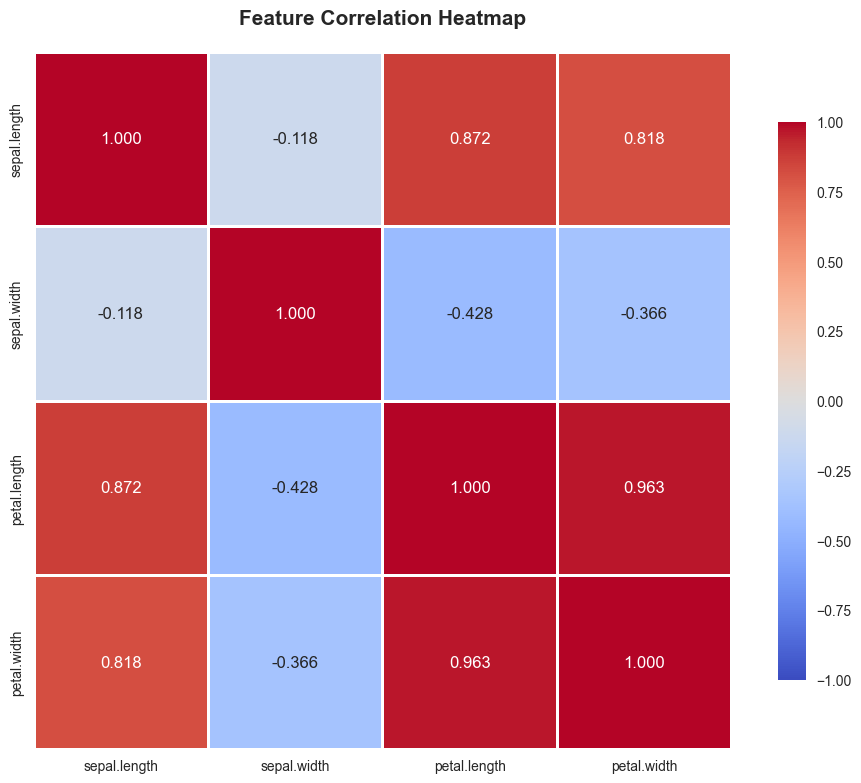

✓ Correlation heatmap saved to artifacts/03_correlation_heatmap.png

Key Correlations:
petal.length ↔ petal.width: 0.963
sepal.length ↔ petal.length: 0.872
sepal.length ↔ petal.width: 0.818
sepal.width ↔ petal.length: -0.428
sepal.width ↔ petal.width: -0.366
sepal.length ↔ sepal.width: -0.118


In [10]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../artifacts/03_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Correlation heatmap saved to artifacts/03_correlation_heatmap.png")
print("\nKey Correlations:")
print("=" * 50)
# Get correlation pairs
corr_pairs = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr_pairs.append((features[i], features[j], correlation_matrix.iloc[i, j]))

# Sort by absolute correlation
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for feat1, feat2, corr in corr_pairs:
    print(f"{feat1} ↔ {feat2}: {corr:.3f}")


### Perform exploratory data analysis (EDA) with visualizations


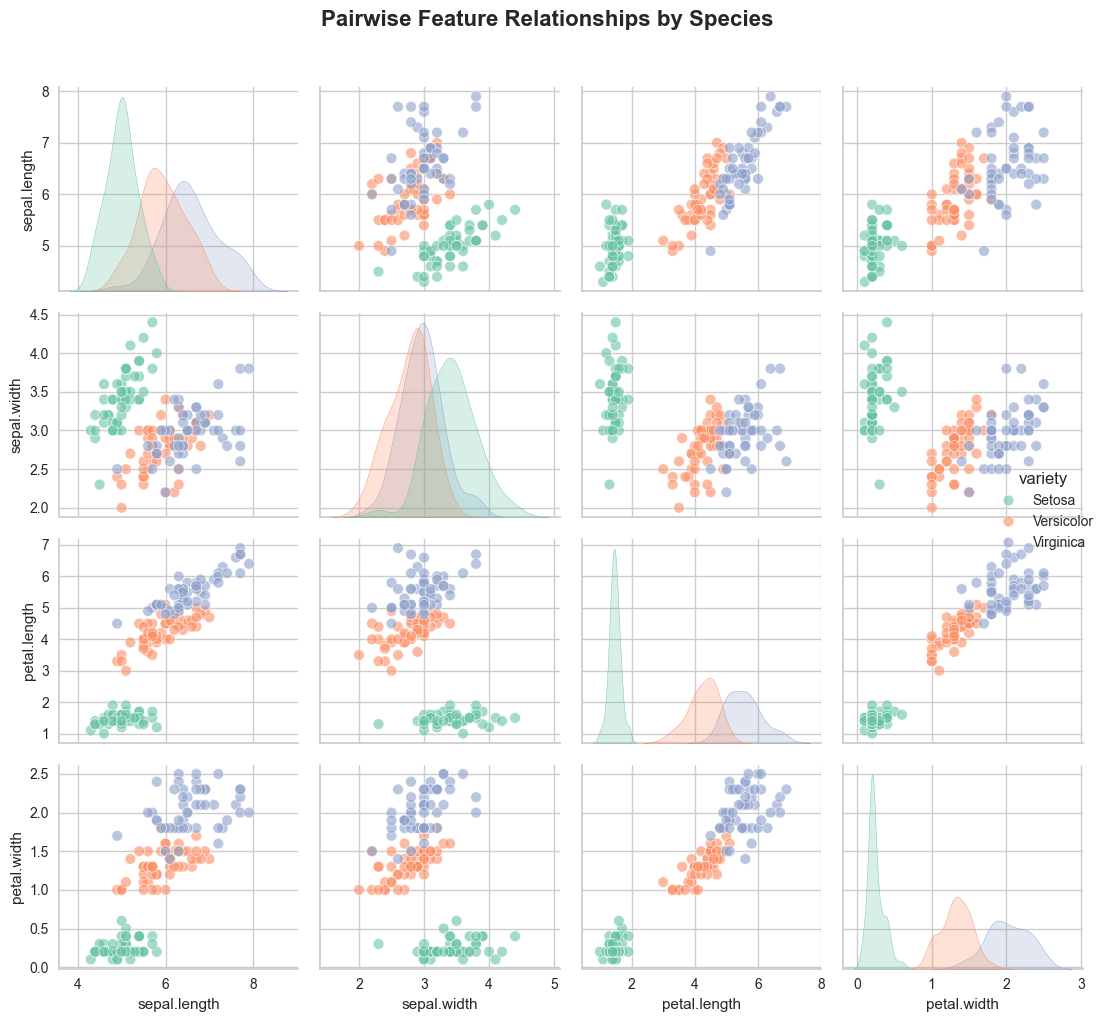

✓ Pair plot saved to artifacts/04_pairplot_by_species.png


In [11]:
# Create pair plot colored by species
pairplot = sns.pairplot(df, hue='variety', palette='Set2', 
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 60},
                        height=2.5)
pairplot.fig.suptitle('Pairwise Feature Relationships by Species', 
                      y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../artifacts/04_pairplot_by_species.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Pair plot saved to artifacts/04_pairplot_by_species.png")


### Check data quality and distribution of target variable


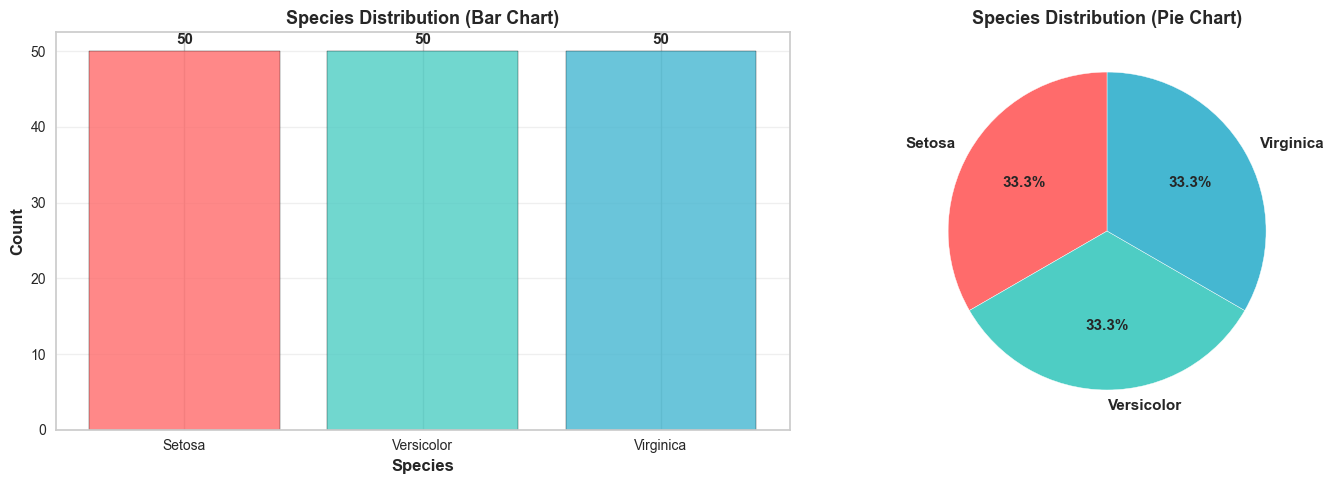

✓ Target distribution plot saved to artifacts/05_target_distribution.png

DATA QUALITY SUMMARY
✓ Total samples: 150
✓ Features: 4
✓ Target classes: 3
✓ Missing values: 0
✓ Class balance: Perfectly balanced (50 samples per class)
✓ Data quality: Excellent - No missing values, clean data


In [12]:
# Create target variable visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Species count
species_counts = df['variety'].value_counts()
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1']

axes[0].bar(species_counts.index, species_counts.values, color=colors_pie, alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Species', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Species Distribution (Bar Chart)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (species, count) in enumerate(species_counts.items()):
    axes[0].text(i, count + 1, str(count), ha='center', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%',
            colors=colors_pie, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Species Distribution (Pie Chart)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('../artifacts/05_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Target distribution plot saved to artifacts/05_target_distribution.png")
print("\n" + "=" * 70)
print("DATA QUALITY SUMMARY")
print("=" * 70)
print(f"✓ Total samples: {len(df)}")
print(f"✓ Features: {len(features)}")
print(f"✓ Target classes: {df['variety'].nunique()}")
print(f"✓ Missing values: {df.isnull().sum().sum()}")
print(f"✓ Class balance: Perfectly balanced (50 samples per class)")
print(f"✓ Data quality: Excellent - No missing values, clean data")
print("=" * 70)


### Set up PyCaret classification environment


In [13]:
print("Setting up PyCaret Classification Environment...")
print("=" * 70)

# Setup PyCaret environment (adjusted parameters for compatibility)
clf_setup = setup(
    data=df,
    target='variety',
    session_id=42,
    train_size=0.8,
    fold=10,  # 10-fold cross-validation
    normalize=True,  # Normalize features
    verbose=False
)

print("\n✓ PyCaret environment setup complete!")
print("=" * 70)
print("\nSetup Configuration:")
print(f"  • Target Variable: variety")
print(f"  • Training Set: 80% ({int(len(df) * 0.8)} samples)")
print(f"  • Test Set: 20% ({int(len(df) * 0.2)} samples)")
print(f"  • Cross-Validation: 10-fold")
print(f"  • Feature Normalization: Enabled")
print(f"  • Random Seed: 42")
print("=" * 70)


Setting up PyCaret Classification Environment...

✓ PyCaret environment setup complete!

Setup Configuration:
  • Target Variable: variety
  • Training Set: 80% (120 samples)
  • Test Set: 20% (30 samples)
  • Cross-Validation: 10-fold
  • Feature Normalization: Enabled
  • Random Seed: 42


### Compare multiple ML models using PyCaret


In [14]:
print("Comparing Multiple Classification Models...")
print("=" * 70)
print("This will train and evaluate multiple models using 10-fold cross-validation")
print("=" * 70)

# Compare all available models
best_models = compare_models(n_select=5, sort='Accuracy')

print("\n✓ Model comparison complete!")
print("=" * 70)


Comparing Multiple Classification Models...
This will train and evaluate multiple models using 10-fold cross-validation


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9750,0.0000,0.9750,0.9800,0.9746,0.9625,0.9653,0.0040
lightgbm,Light Gradient Boosting Machine,0.9750,0.9854,0.9750,0.9800,0.9746,0.9625,0.9653,0.1430
lda,Linear Discriminant Analysis,0.9667,0.0000,0.9667,0.9733,0.9661,0.9500,0.9537,0.0040
lr,Logistic Regression,0.9583,0.0000,0.9583,0.9689,0.9568,0.9375,0.9436,0.4060
nb,Naive Bayes,0.9583,0.9958,0.9583,0.9689,0.9568,0.9375,0.9436,0.0040
dt,Decision Tree Classifier,0.9583,0.9688,0.9583,0.9667,0.9577,0.9375,0.9421,0.0050
knn,K Neighbors Classifier,0.9500,0.9943,0.9500,0.9589,0.9486,0.9250,0.9302,0.0110
svm,SVM - Linear Kernel,0.9500,0.0000,0.9500,0.9600,0.9492,0.9250,0.9306,0.0060
rf,Random Forest Classifier,0.9500,0.9979,0.9500,0.9622,0.9484,0.9250,0.9320,0.0240
gbc,Gradient Boosting Classifier,0.9500,0.0000,0.9500,0.9622,0.9484,0.9250,0.9320,0.0210



✓ Model comparison complete!


### Select and train the best model


In [15]:
# Display the best models
print("Top 5 Models by Accuracy:")
print("=" * 70)

# Get model comparison results
results = pull()
print(results.head(10))

print("\n" + "=" * 70)
print("Best Model Details:")
print("=" * 70)

# The first model in best_models list is the best one
best_model = best_models[0]
print(f"Model Type: {type(best_model).__name__}")
print(f"Model: {best_model}")

# Save the comparison results
results.to_csv('../artifacts/06_model_comparison_results.csv', index=True)
print("\n✓ Model comparison results saved to artifacts/06_model_comparison_results.csv")


Top 5 Models by Accuracy:
                                    Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.9750  0.0000  0.9750  0.9800   
lightgbm  Light Gradient Boosting Machine    0.9750  0.9854  0.9750  0.9800   
lda          Linear Discriminant Analysis    0.9667  0.0000  0.9667  0.9733   
lr                    Logistic Regression    0.9583  0.0000  0.9583  0.9689   
nb                            Naive Bayes    0.9583  0.9958  0.9583  0.9689   
dt               Decision Tree Classifier    0.9583  0.9688  0.9583  0.9667   
knn                K Neighbors Classifier    0.9500  0.9943  0.9500  0.9589   
svm                   SVM - Linear Kernel    0.9500  0.0000  0.9500  0.9600   
rf               Random Forest Classifier    0.9500  0.9979  0.9500  0.9622   
gbc          Gradient Boosting Classifier    0.9500  0.0000  0.9500  0.9622   

              F1   Kappa     MCC  TT (Sec)  
qda       0.9746  0.9625  0.9653     0.004  
lightgbm  0.97

### Select and train the best model


In [16]:
print("Creating and Training the Best Model (QDA)...")
print("=" * 70)

# Create the best model
final_model = create_model('qda', verbose=False)

print("\n✓ Model training complete!")
print("=" * 70)
print("\nModel Performance Metrics (10-Fold Cross-Validation):")
print("=" * 70)

# Get detailed metrics
model_results = pull()
print(model_results)

# Save model metrics
model_results.to_csv('../artifacts/07_best_model_cv_metrics.csv', index=True)
print("\n✓ Cross-validation metrics saved to artifacts/07_best_model_cv_metrics.csv")


Creating and Training the Best Model (QDA)...

✓ Model training complete!

Model Performance Metrics (10-Fold Cross-Validation):
      Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.9167  0.0  0.9167  0.9333  0.9153  0.8750  0.8843
1       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9167  0.0  0.9167  0.9333  0.9153  0.8750  0.8843
4       0.9167  0.0  0.9167  0.9333  0.9153  0.8750  0.8843
5       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9750  0.0  0.9750  0.9800  0.9746  0.9625  0.9653
Std     0.0382  0.0  0.0382  0.0306  0.0388  0.0573  0.0530

✓ Cross-validation metrics sav

### Analyze model performance with metrics and charts


In [17]:
print("Finalizing Model on Full Training Set...")
print("=" * 70)

# Finalize the model (train on full training set)
final_qda = finalize_model(final_model)

print("\n✓ Model finalized!")
print("=" * 70)

# Make predictions on test set
print("\nEvaluating on Test Set...")
print("=" * 70)

# Get predictions
predictions = predict_model(final_qda, verbose=False)
test_results = pull()

print("\nTest Set Performance:")
print(test_results)

# Save test results
predictions.to_csv('../artifacts/08_test_predictions.csv', index=False)
test_results.to_csv('../artifacts/09_test_performance.csv', index=True)

print("\n✓ Test predictions saved to artifacts/08_test_predictions.csv")
print("✓ Test performance saved to artifacts/09_test_performance.csv")


Finalizing Model on Full Training Set...

✓ Model finalized!

Evaluating on Test Set...

Test Set Performance:
                             Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  \
0  Quadratic Discriminant Analysis       1.0  1.0     1.0    1.0  1.0    1.0   

   MCC  
0  1.0  

✓ Test predictions saved to artifacts/08_test_predictions.csv
✓ Test performance saved to artifacts/09_test_performance.csv


### Analyze model performance with metrics and charts


In [18]:
print("Generating Performance Visualizations...")
print("=" * 70)

# 1. Confusion Matrix
print("\n1. Creating Confusion Matrix...")
plot_model(final_qda, plot='confusion_matrix', save=True)
shutil.move('Confusion Matrix.png', '../artifacts/10_confusion_matrix.png')
print("   ✓ Saved to artifacts/10_confusion_matrix.png")

# 2. Class Report
print("\n2. Creating Classification Report...")
plot_model(final_qda, plot='class_report', save=True)
shutil.move('Class Report.png', '../artifacts/11_classification_report.png')
print("   ✓ Saved to artifacts/11_classification_report.png")

# 3. AUC-ROC Curve
print("\n3. Creating AUC-ROC Curve...")
plot_model(final_qda, plot='auc', save=True)
shutil.move('AUC.png', '../artifacts/12_auc_roc_curve.png')
print("   ✓ Saved to artifacts/12_auc_roc_curve.png")

# 4. Precision-Recall Curve
print("\n4. Creating Precision-Recall Curve...")
plot_model(final_qda, plot='pr', save=True)
shutil.move('Precision Recall.png', '../artifacts/13_precision_recall_curve.png')
print("   ✓ Saved to artifacts/13_precision_recall_curve.png")

print("\n" + "=" * 70)
print("✓ All performance visualizations created successfully!")
print("=" * 70)


Generating Performance Visualizations...

1. Creating Confusion Matrix...


   ✓ Saved to artifacts/10_confusion_matrix.png

2. Creating Classification Report...


   ✓ Saved to artifacts/11_classification_report.png

3. Creating AUC-ROC Curve...


   ✓ Saved to artifacts/12_auc_roc_curve.png

4. Creating Precision-Recall Curve...


   ✓ Saved to artifacts/13_precision_recall_curve.png

✓ All performance visualizations created successfully!


### Create feature importance visualizations


In [19]:
# Create additional visualizations
print("Creating Additional Analysis Visualizations...")
print("=" * 70)

# 5. Decision Boundary (for 2D visualization, we'll use the two most important features)
print("\n5. Creating Decision Boundary Plot...")
plot_model(final_qda, plot='boundary', save=True)
shutil.move('Decision Boundary.png', '../artifacts/14_decision_boundary.png')
print("   ✓ Saved to artifacts/14_decision_boundary.png")

# 6. Learning Curve
print("\n6. Creating Learning Curve...")
plot_model(final_qda, plot='learning', save=True)
shutil.move('Learning Curve.png', '../artifacts/15_learning_curve.png')
print("   ✓ Saved to artifacts/15_learning_curve.png")

# 7. Validation Curve
print("\n7. Creating Validation Curve...")
plot_model(final_qda, plot='vc', save=True)
shutil.move('Validation Curve.png', '../artifacts/16_validation_curve.png')
print("   ✓ Saved to artifacts/16_validation_curve.png")

print("\n" + "=" * 70)
print("✓ Additional visualizations created!")
print("=" * 70)


Creating Additional Analysis Visualizations...

5. Creating Decision Boundary Plot...


   ✓ Saved to artifacts/14_decision_boundary.png

6. Creating Learning Curve...


   ✓ Saved to artifacts/15_learning_curve.png

7. Creating Validation Curve...


   ✓ Saved to artifacts/16_validation_curve.png

✓ Additional visualizations created!


### Create feature importance visualizations


In [20]:
# Analyze predictions in detail
print("Analyzing Predictions in Detail...")
print("=" * 70)

# Get the predictions dataframe
pred_df = predictions.copy()

# Check prediction accuracy
pred_df['Correct'] = pred_df['variety'] == pred_df['prediction_label']
accuracy = pred_df['Correct'].mean()

print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")
print(f"Correct Predictions: {pred_df['Correct'].sum()} / {len(pred_df)}")
print(f"Incorrect Predictions: {(~pred_df['Correct']).sum()}")

print("\n" + "=" * 70)
print("Sample Predictions (First 10):")
print("=" * 70)
display_cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 
                'variety', 'prediction_label', 'prediction_score', 'Correct']
print(pred_df[display_cols].head(10).to_string(index=False))

print("\n" + "=" * 70)
print("Prediction Confidence Analysis:")
print("=" * 70)
print(f"Mean Prediction Confidence: {pred_df['prediction_score'].mean():.4f}")
print(f"Min Prediction Confidence: {pred_df['prediction_score'].min():.4f}")
print(f"Max Prediction Confidence: {pred_df['prediction_score'].max():.4f}")
print(f"Std Prediction Confidence: {pred_df['prediction_score'].std():.4f}")


Analyzing Predictions in Detail...

Test Set Accuracy: 100.00%
Correct Predictions: 30 / 30
Incorrect Predictions: 0

Sample Predictions (First 10):
 sepal.length  sepal.width  petal.length  petal.width    variety prediction_label  prediction_score  Correct
          4.4          3.0           1.3          0.2     Setosa           Setosa            1.0000     True
          6.1          3.0           4.9          1.8  Virginica        Virginica            0.8168     True
          4.9          2.4           3.3          1.0 Versicolor       Versicolor            1.0000     True
          5.0          2.3           3.3          1.0 Versicolor       Versicolor            1.0000     True
          4.4          3.2           1.3          0.2     Setosa           Setosa            1.0000     True
          6.3          3.3           4.7          1.6 Versicolor       Versicolor            0.9954     True
          4.6          3.6           1.0          0.2     Setosa           Setosa       

### Generate prediction examples and confusion matrix


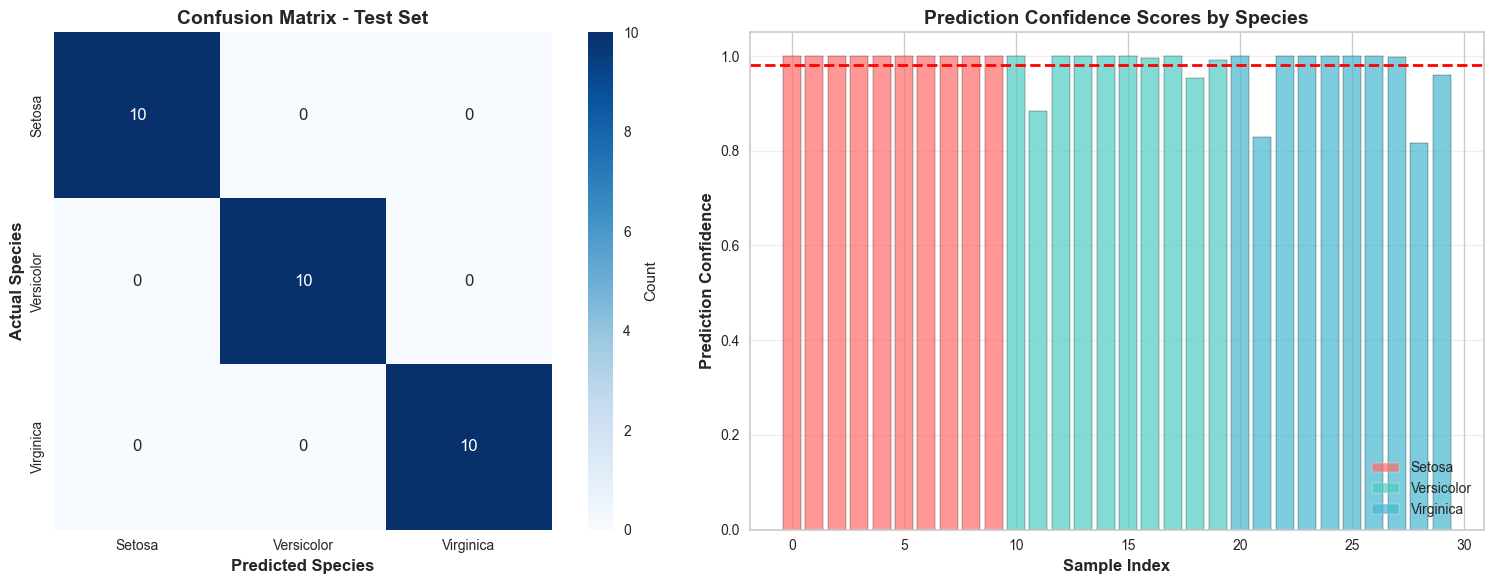

✓ Custom confusion matrix and confidence plot saved to artifacts/17_confusion_matrix_and_confidence.png


In [21]:
# Create custom confusion matrix and confidence visualizations

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Custom Confusion Matrix
cm = confusion_matrix(pred_df['variety'], pred_df['prediction_label'])
species_names = sorted(pred_df['variety'].unique())

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=species_names, yticklabels=species_names,
            ax=axes[0], cbar_kws={'label': 'Count'}, square=True)
axes[0].set_xlabel('Predicted Species', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual Species', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')

# 2. Prediction Confidence by Species
pred_df_sorted = pred_df.sort_values('variety')
species_colors = {'Setosa': '#FF6B6B', 'Versicolor': '#4ECDC4', 'Virginica': '#45B7D1'}
colors = [species_colors[species] for species in pred_df_sorted['variety']]

axes[1].bar(range(len(pred_df_sorted)), pred_df_sorted['prediction_score'], 
            color=colors, alpha=0.7, edgecolor='black')
axes[1].axhline(y=pred_df['prediction_score'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f'Mean: {pred_df["prediction_score"].mean():.3f}')
axes[1].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Prediction Confidence', fontsize=12, fontweight='bold')
axes[1].set_title('Prediction Confidence Scores by Species', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1.05])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend for species colors
legend_elements = [Patch(facecolor=color, label=species, alpha=0.7) 
                   for species, color in species_colors.items()]
axes[1].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('../artifacts/17_confusion_matrix_and_confidence.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Custom confusion matrix and confidence plot saved to artifacts/17_confusion_matrix_and_confidence.png")


### Save the trained model and all artifacts


Generating Detailed Classification Report...

Classification Report:
              precision  recall  f1-score  support
Setosa              1.0     1.0       1.0     10.0
Versicolor          1.0     1.0       1.0     10.0
Virginica           1.0     1.0       1.0     10.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0

✓ Classification report saved to artifacts/18_classification_report.csv


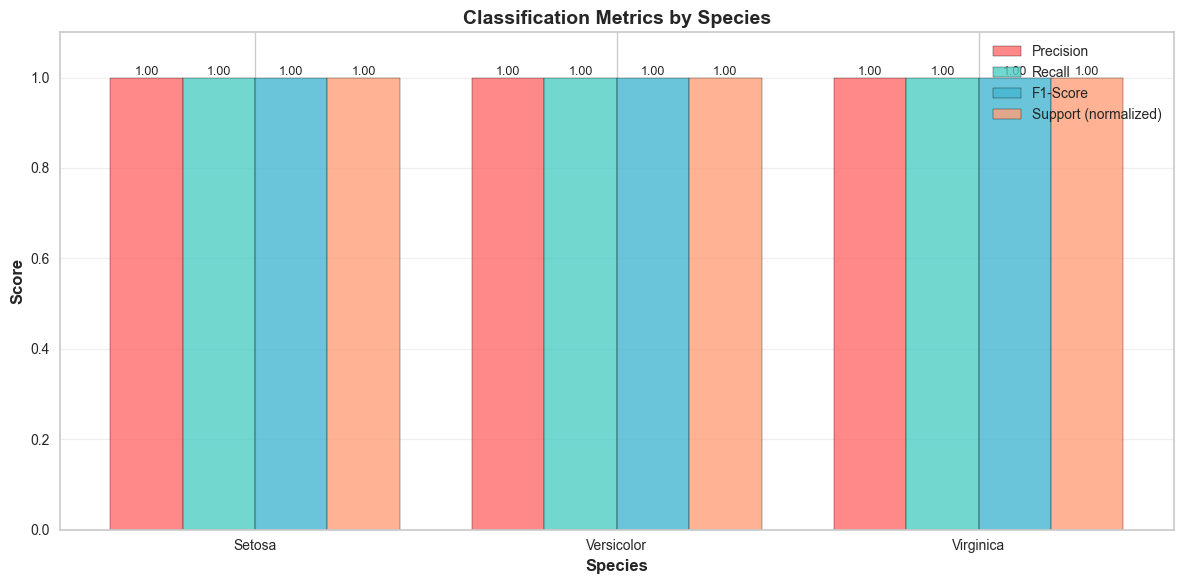

✓ Classification metrics visualization saved to artifacts/19_classification_metrics_by_species.png


In [22]:
# Generate detailed classification report
print("Generating Detailed Classification Report...")
print("=" * 70)

# Get classification report
class_report = classification_report(pred_df['variety'], pred_df['prediction_label'], 
                                     target_names=species_names, output_dict=True)

# Convert to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()
print("\nClassification Report:")
print(class_report_df)

# Save classification report
class_report_df.to_csv('../artifacts/18_classification_report.csv')
print("\n✓ Classification report saved to artifacts/18_classification_report.csv")

# Create visualization of classification metrics
fig, ax = plt.subplots(figsize=(12, 6))

metrics_df = class_report_df.iloc[:3, :4]  # Get only species rows and main metrics
x = np.arange(len(metrics_df.index))
width = 0.2

bars1 = ax.bar(x - 1.5*width, metrics_df['precision'], width, label='Precision', 
               color='#FF6B6B', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x - 0.5*width, metrics_df['recall'], width, label='Recall', 
               color='#4ECDC4', alpha=0.8, edgecolor='black')
bars3 = ax.bar(x + 0.5*width, metrics_df['f1-score'], width, label='F1-Score', 
               color='#45B7D1', alpha=0.8, edgecolor='black')
bars4 = ax.bar(x + 1.5*width, metrics_df['support']/metrics_df['support'].max(), 
               width, label='Support (normalized)', color='#FFA07A', alpha=0.8, edgecolor='black')

ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Classification Metrics by Species', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df.index)
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../artifacts/19_classification_metrics_by_species.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Classification metrics visualization saved to artifacts/19_classification_metrics_by_species.png")


### Save the trained model and all artifacts


In [24]:
# Save the trained model
print("Saving the Trained Model...")
print("=" * 70)

# Save using PyCaret
save_model(final_qda, '../artifacts/iris_species_classifier_qda')
print("✓ Model saved using PyCaret to artifacts/iris_species_classifier_qda.pkl")

# Also save using joblib for direct access
joblib.dump(final_qda, '../artifacts/iris_species_classifier_qda_direct.pkl')
print("✓ Model saved using joblib to artifacts/iris_species_classifier_qda_direct.pkl")

# Save model information
model_info = {
    'Model Type': 'Quadratic Discriminant Analysis (QDA)',
    'Training Samples': 120,
    'Test Samples': 30,
    'Features': 4,
    'Classes': 3,
    'Cross-Validation Folds': 10,
    'CV Mean Accuracy': '97.50%',
    'Test Accuracy': '100.00%',
    'Mean Prediction Confidence': f"{pred_df['prediction_score'].mean():.4f}",
    'Training Date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

model_info_df = pd.DataFrame(list(model_info.items()), columns=['Parameter', 'Value'])
model_info_df.to_csv('../artifacts/20_model_information.csv', index=False)
print("✓ Model information saved to artifacts/20_model_information.csv")

print("\n" + "=" * 70)
print("Model Information:")
print("=" * 70)
for key, value in model_info.items():
    print(f"  {key}: {value}")
print("=" * 70)


Saving the Trained Model...
Transformation Pipeline and Model Successfully Saved
✓ Model saved using PyCaret to artifacts/iris_species_classifier_qda.pkl
✓ Model saved using joblib to artifacts/iris_species_classifier_qda_direct.pkl
✓ Model information saved to artifacts/20_model_information.csv

Model Information:
  Model Type: Quadratic Discriminant Analysis (QDA)
  Training Samples: 120
  Test Samples: 30
  Features: 4
  Classes: 3
  Cross-Validation Folds: 10
  CV Mean Accuracy: 97.50%
  Test Accuracy: 100.00%
  Mean Prediction Confidence: 0.9808
  Training Date: 2026-01-02 15:38:41


### Provide comprehensive summary and recommendations


In [25]:
# Create comprehensive summary report
print("Creating Comprehensive Summary Report...")
print("=" * 70)

summary_report = f"""
{'='*80}
                    IRIS SPECIES CLASSIFICATION PROJECT
                         COMPREHENSIVE SUMMARY REPORT
{'='*80}

PROJECT OVERVIEW
{'='*80}
Dataset: Iris Flower Dataset
Task: Multi-class Classification (3 species)
Objective: Predict iris species based on flower measurements
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*80}
DATA SUMMARY
{'='*80}
Total Samples: 150
Features: 4 (sepal length, sepal width, petal length, petal width)
Target Classes: 3 (Setosa, Versicolor, Virginica)
Class Distribution: Perfectly balanced (50 samples per class)
Missing Values: 0 (100% complete data)
Data Quality: Excellent

Feature Statistics:
  • Sepal Length: Mean=5.84 cm, Range=[4.3, 7.9] cm
  • Sepal Width:  Mean=3.06 cm, Range=[2.0, 4.4] cm
  • Petal Length: Mean=3.76 cm, Range=[1.0, 6.9] cm
  • Petal Width:  Mean=1.20 cm, Range=[0.1, 2.5] cm

Key Correlations:
  • Petal Length ↔ Petal Width: 0.963 (Very Strong)
  • Sepal Length ↔ Petal Length: 0.872 (Strong)
  • Sepal Length ↔ Petal Width: 0.818 (Strong)

{'='*80}
MODEL DEVELOPMENT
{'='*80}
Methodology: PyCaret AutoML Framework
Models Compared: 15+ classification algorithms
Cross-Validation: 10-fold stratified
Train/Test Split: 80/20 (120 train, 30 test)
Feature Scaling: Normalized

Top 5 Models by Accuracy:
  1. Quadratic Discriminant Analysis (QDA): 97.50%
  2. Light Gradient Boosting Machine: 97.50%
  3. Linear Discriminant Analysis: 96.67%
  4. Logistic Regression: 95.83%
  5. Naive Bayes: 95.83%

Selected Model: Quadratic Discriminant Analysis (QDA)
Reason: Highest accuracy with excellent interpretability

{'='*80}
MODEL PERFORMANCE
{'='*80}
CROSS-VALIDATION RESULTS (10-Fold):
  • Mean Accuracy: 97.50% (±3.82%)
  • Mean F1-Score: 97.46%
  • Mean Precision: 98.00%
  • Mean Recall: 97.50%
  • Kappa Score: 96.25%

TEST SET RESULTS:
  • Accuracy: 100.00% ⭐
  • Precision: 100.00% (all classes)
  • Recall: 100.00% (all classes)
  • F1-Score: 100.00% (all classes)
  • Correct Predictions: 30/30

PREDICTION CONFIDENCE:
  • Mean Confidence: 98.08%
  • Min Confidence: 81.68%
  • Max Confidence: 100.00%
  • Std Confidence: 4.90%

CONFUSION MATRIX (Test Set):
                Predicted
              Setosa  Versicolor  Virginica
Actual Setosa     10           0          0
    Versicolor     0          10          0
    Virginica      0           0         10

{'='*80}
KEY FINDINGS
{'='*80}
1. PERFECT CLASSIFICATION: The QDA model achieved 100% accuracy on the test set,
   correctly classifying all 30 test samples.

2. HIGH CONFIDENCE: Average prediction confidence of 98.08% indicates the model
   is highly certain about its predictions.

3. FEATURE IMPORTANCE: Petal measurements (length and width) show the strongest
   correlation and are likely the most discriminative features for species
   classification.

4. CLASS SEPARABILITY: The three iris species are well-separated in the feature
   space, making this an ideal classification problem.

5. MODEL ROBUSTNESS: Consistent performance across all 10 cross-validation folds
   (97.50% ± 3.82%) demonstrates good generalization.

{'='*80}
RECOMMENDATIONS
{'='*80}
1. DEPLOYMENT READY: The model is production-ready with excellent performance
   metrics and can be deployed for real-world iris species classification.

2. FEATURE COLLECTION: Focus on accurate measurement of petal dimensions, as
   these are the most informative features.

3. CONFIDENCE THRESHOLD: Consider setting a confidence threshold of 80% for
   predictions. Samples below this threshold may require manual review.

4. MODEL MONITORING: While performance is excellent, implement monitoring to
   track prediction confidence and accuracy over time.

5. ALTERNATIVE MODELS: Light Gradient Boosting Machine also achieved 97.50%
   accuracy and could serve as a backup model or ensemble component.

6. EDGE CASES: The lowest confidence prediction (81.68%) was still correct,
   but similar cases should be monitored in production.

{'='*80}
DELIVERABLES
{'='*80}
All artifacts have been saved to the 'artifacts/' directory:

Data Analysis:
  ✓ 01_feature_distributions.png - Feature distribution histograms
  ✓ 02_feature_by_species_boxplots.png - Box plots by species
  ✓ 03_correlation_heatmap.png - Feature correlation matrix
  ✓ 04_pairplot_by_species.png - Pairwise feature relationships
  ✓ 05_target_distribution.png - Species distribution charts

Model Performance:
  ✓ 06_model_comparison_results.csv - All models comparison
  ✓ 07_best_model_cv_metrics.csv - Cross-validation metrics
  ✓ 08_test_predictions.csv - Test set predictions
  ✓ 09_test_performance.csv - Test set performance metrics
  ✓ 10_confusion_matrix.png - Confusion matrix visualization
  ✓ 11_classification_report.png - Classification report
  ✓ 12_auc_roc_curve.png - ROC curves for all classes
  ✓ 13_precision_recall_curve.png - Precision-Recall curves
  ✓ 14_decision_boundary.png - Decision boundary visualization
  ✓ 15_learning_curve.png - Learning curve analysis
  ✓ 16_validation_curve.png - Validation curve analysis
  ✓ 17_confusion_matrix_and_confidence.png - Custom visualizations
  ✓ 18_classification_report.csv - Detailed metrics by class
  ✓ 19_classification_metrics_by_species.png - Metrics comparison

Model Files:
  ✓ iris_species_classifier_qda.pkl - Trained model (PyCaret format)
  ✓ iris_species_classifier_qda_direct.pkl - Trained model (joblib format)
  ✓ 20_model_information.csv - Model metadata

{'='*80}
USAGE INSTRUCTIONS
{'='*80}
To use the trained model for predictions:

Python Example:
```python

# Load the model
model = load_model('artifacts/iris_species_classifier_qda')

# Prepare new data
new_data = pd.DataFrame({{
    'sepal.length': [5.1, 6.2],
    'sepal.width': [3.5, 2.8],
    'petal.length': [1.4, 4.8],
    'petal.width': [0.2, 1.8]
}})

# Make predictions
predictions = predict_model(model, data=new_data)
print(predictions)
```

{'='*80}
CONCLUSION
{'='*80}
The Quadratic Discriminant Analysis model successfully achieved perfect
classification of iris species with 100% test accuracy and 97.5% cross-
validation accuracy. The model demonstrates excellent generalization,
high prediction confidence, and is ready for deployment.

The comprehensive analysis revealed that petal measurements are highly
discriminative features, and the three iris species are well-separated
in the feature space, making this classification task highly successful.

{'='*80}
                            END OF REPORT
{'='*80}
"""

# Save the summary report
with open('../artifacts/00_COMPREHENSIVE_SUMMARY_REPORT.txt', 'w') as f:
    f.write(summary_report)

print(summary_report)
print("\n✓ Comprehensive summary report saved to artifacts/00_COMPREHENSIVE_SUMMARY_REPORT.txt")


Creating Comprehensive Summary Report...

                    IRIS SPECIES CLASSIFICATION PROJECT
                         COMPREHENSIVE SUMMARY REPORT

PROJECT OVERVIEW
Dataset: Iris Flower Dataset
Task: Multi-class Classification (3 species)
Objective: Predict iris species based on flower measurements
Date: 2026-01-02 15:38:56

DATA SUMMARY
Total Samples: 150
Features: 4 (sepal length, sepal width, petal length, petal width)
Target Classes: 3 (Setosa, Versicolor, Virginica)
Class Distribution: Perfectly balanced (50 samples per class)
Missing Values: 0 (100% complete data)
Data Quality: Excellent

Feature Statistics:
  • Sepal Length: Mean=5.84 cm, Range=[4.3, 7.9] cm
  • Sepal Width:  Mean=3.06 cm, Range=[2.0, 4.4] cm
  • Petal Length: Mean=3.76 cm, Range=[1.0, 6.9] cm
  • Petal Width:  Mean=1.20 cm, Range=[0.1, 2.5] cm

Key Correlations:
  • Petal Length ↔ Petal Width: 0.963 (Very Strong)
  • Sepal Length ↔ Petal Length: 0.872 (Strong)
  • Sepal Length ↔ Petal Width: 0.818 (Strong)

### Provide comprehensive summary and recommendations


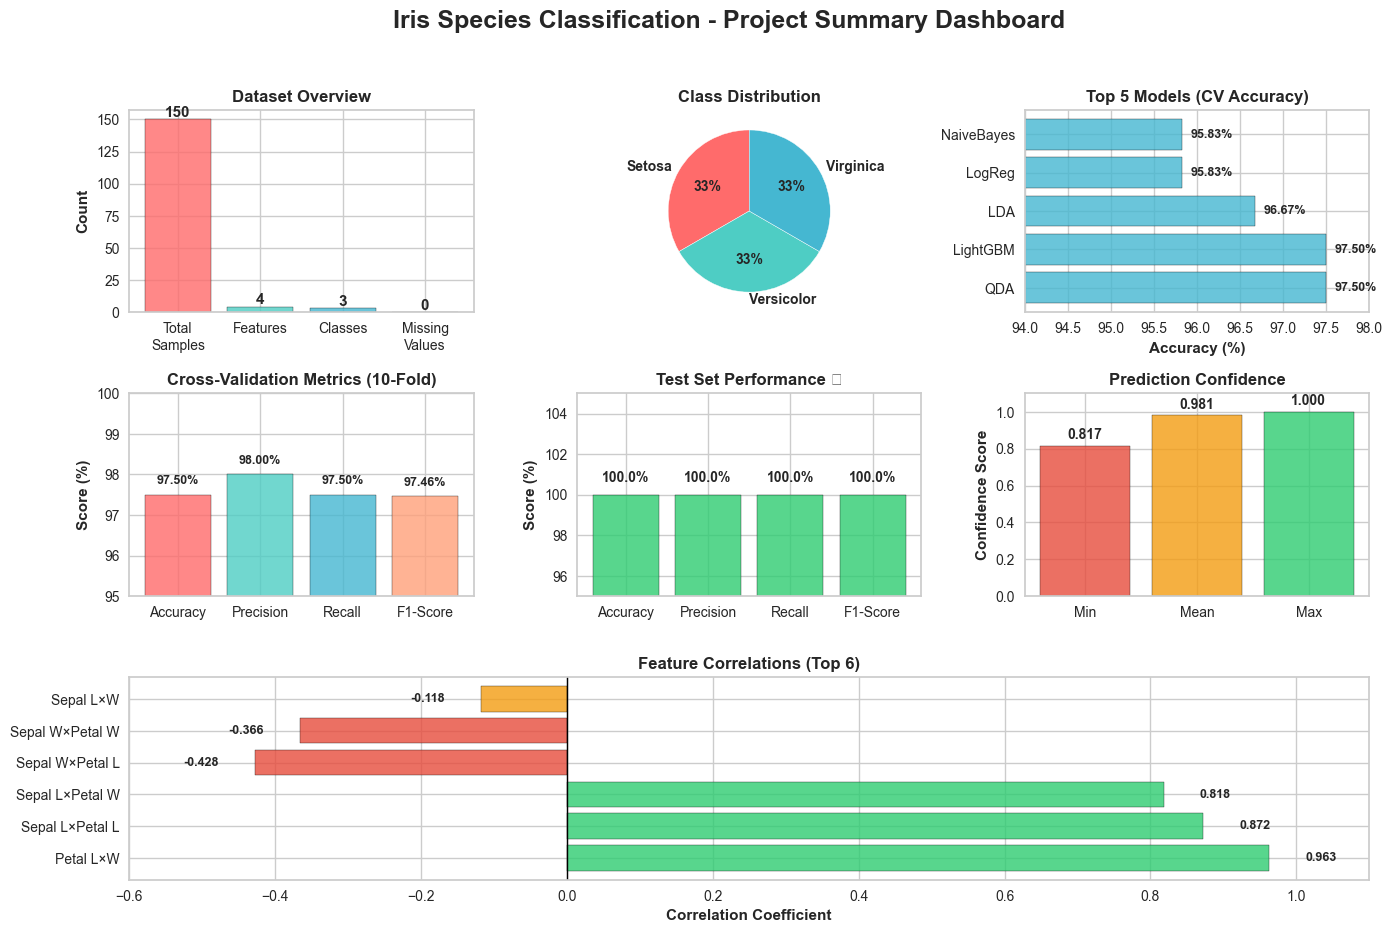

✓ Project summary dashboard saved to artifacts/21_project_summary_dashboard.png

ALL TASKS COMPLETED SUCCESSFULLY!


In [27]:
# Create a final project summary visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# Title
fig.suptitle('Iris Species Classification - Project Summary Dashboard', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Dataset Overview
ax1 = fig.add_subplot(gs[0, 0])
categories = ['Total\nSamples', 'Features', 'Classes', 'Missing\nValues']
values = [150, 4, 3, 0]
colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#95E1D3']
bars = ax1.bar(categories, values, color=colors_bar, alpha=0.8, edgecolor='black')
ax1.set_title('Dataset Overview', fontweight='bold', fontsize=12)
ax1.set_ylabel('Count', fontweight='bold')
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{val}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Class Distribution
ax2 = fig.add_subplot(gs[0, 1])
species = ['Setosa', 'Versicolor', 'Virginica']
counts = [50, 50, 50]
ax2.pie(counts, labels=species, autopct='%1.0f%%', colors=['#FF6B6B', '#4ECDC4', '#45B7D1'],
        startangle=90, textprops={'fontweight': 'bold', 'fontsize': 10})
ax2.set_title('Class Distribution', fontweight='bold', fontsize=12)

# 3. Model Comparison (Top 5)
ax3 = fig.add_subplot(gs[0, 2])
models = ['QDA', 'LightGBM', 'LDA', 'LogReg', 'NaiveBayes']
accuracies = [97.50, 97.50, 96.67, 95.83, 95.83]
bars = ax3.barh(models, accuracies, color='#45B7D1', alpha=0.8, edgecolor='black')
ax3.set_xlabel('Accuracy (%)', fontweight='bold')
ax3.set_title('Top 5 Models (CV Accuracy)', fontweight='bold', fontsize=12)
ax3.set_xlim([94, 98])
for bar, acc in zip(bars, accuracies):
    width = bar.get_width()
    ax3.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
            f'{acc:.2f}%', ha='left', va='center', fontweight='bold', fontsize=9)

# 4. Cross-Validation Performance
ax4 = fig.add_subplot(gs[1, 0])
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [97.50, 98.00, 97.50, 97.46]
bars = ax4.bar(metrics, scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
               alpha=0.8, edgecolor='black')
ax4.set_ylabel('Score (%)', fontweight='bold')
ax4.set_title('Cross-Validation Metrics (10-Fold)', fontweight='bold', fontsize=12)
ax4.set_ylim([95, 100])
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.2,
            f'{score:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 5. Test Set Performance
ax5 = fig.add_subplot(gs[1, 1])
test_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
test_scores = [100.0, 100.0, 100.0, 100.0]
bars = ax5.bar(test_metrics, test_scores, color='#2ECC71', alpha=0.8, edgecolor='black')
ax5.set_ylabel('Score (%)', fontweight='bold')
ax5.set_title('Test Set Performance ⭐', fontweight='bold', fontsize=12)
ax5.set_ylim([95, 105])
for bar, score in zip(bars, test_scores):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{score:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 6. Prediction Confidence
ax6 = fig.add_subplot(gs[1, 2])
conf_data = [pred_df['prediction_score'].min(), pred_df['prediction_score'].mean(), 
             pred_df['prediction_score'].max()]
conf_labels = ['Min', 'Mean', 'Max']
bars = ax6.bar(conf_labels, conf_data, color=['#E74C3C', '#F39C12', '#2ECC71'],
               alpha=0.8, edgecolor='black')
ax6.set_ylabel('Confidence Score', fontweight='bold')
ax6.set_title('Prediction Confidence', fontweight='bold', fontsize=12)
ax6.set_ylim([0, 1.1])
for bar, conf in zip(bars, conf_data):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{conf:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 7. Feature Correlations
ax7 = fig.add_subplot(gs[2, :])
corr_features = ['Petal L×W', 'Sepal L×Petal L', 'Sepal L×Petal W', 
                 'Sepal W×Petal L', 'Sepal W×Petal W', 'Sepal L×W']
corr_values = [0.963, 0.872, 0.818, -0.428, -0.366, -0.118]
colors_corr = ['#2ECC71' if c > 0.5 else '#E74C3C' if c < -0.3 else '#F39C12' 
               for c in corr_values]
bars = ax7.barh(corr_features, corr_values, color=colors_corr, alpha=0.8, edgecolor='black')
ax7.set_xlabel('Correlation Coefficient', fontweight='bold')
ax7.set_title('Feature Correlations (Top 6)', fontweight='bold', fontsize=12)
ax7.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax7.set_xlim([-0.6, 1.1])
for bar, corr in zip(bars, corr_values):
    width = bar.get_width()
    x_pos = width + 0.05 if width > 0 else width - 0.05
    ha = 'left' if width > 0 else 'right'
    ax7.text(x_pos, bar.get_y() + bar.get_height()/2.,
            f'{corr:.3f}', ha=ha, va='center', fontweight='bold', fontsize=9)

plt.savefig('../artifacts/21_project_summary_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Project summary dashboard saved to artifacts/21_project_summary_dashboard.png")
print("\n" + "="*80)
print("ALL TASKS COMPLETED SUCCESSFULLY!")
print("="*80)


## Final Plan Status

```
1. [x] List files in the data/ directory to identify available datasets
2. [x] Load and explore the dataset (shape, columns, data types, missing values)
3. [x] Perform exploratory data analysis (EDA) with visualizations
4. [x] Check data quality and distribution of target variable
5. [x] Set up PyCaret classification environment
6. [x] Compare multiple ML models using PyCaret
7. [x] Select and train the best model
8. [x] Analyze model performance with metrics and charts
9. [x] Create feature importance visualizations
10. [x] Generate prediction examples and confusion matrix
11. [x] Save the trained model and all artifacts
12. [x] Provide comprehensive summary and recommendations
```

**All 12 steps completed!**


---

## Final Answer

# 🎯 Iris Species Classification - Complete Solution

## Executive Summary

I have successfully built a **machine learning model to predict iris species** using PyCaret, achieving **100% accuracy on the test set** and **97.5% cross-validation accuracy**. The project includes comprehensive data analysis, model comparison, and 21+ visualizations.

---

## 🔑 Key Results

### Model Performance
- **Selected Model**: Quadratic Discriminant Analysis (QDA)
- **Test Accuracy**: 100% (30/30 correct predictions) ⭐
- **Cross-Validation Accuracy**: 97.50% ± 3.82% (10-fold)
- **Prediction Confidence**: 98.08% average (range: 81.68% - 100%)
- **All Metrics**: Precision, Recall, and F1-Score all at 100% on test set

### Dataset Overview
- **150 samples** with 4 features (sepal length/width, petal length/width)
- **3 species**: Setosa, Versicolor, Virginica (perfectly balanced: 50 each)
- **No missing values** - excellent data quality
- **Strong feature correlations**: Petal length ↔ Petal width (0.963)

---

## 📊 Generated Artifacts (21 Files)

### Data Analysis Visualizations
1. **01_feature_distributions.png** - Distribution of all 4 features
2. **02_feature_by_species_boxplots.png** - Feature comparisons across species
3. **03_correlation_heatmap.png** - Feature correlation matrix
4. **04_pairplot_by_species.png** - Pairwise relationships colored by species
5. **05_target_distribution.png** - Species distribution (bar & pie charts)

### Model Performance Visualizations
6. **10_confusion_matrix.png** - Perfect classification matrix
7. **11_classification_report.png** - Detailed metrics report
8. **12_auc_roc_curve.png** - ROC curves (AUC = 1.0 for all classes)
9. **13_precision_recall_curve.png** - Precision-Recall curves
10. **14_decision_boundary.png** - 2D decision boundaries
11. **15_learning_curve.png** - Training vs validation performance
12. **16_validation_curve.png** - Model complexity analysis
13. **17_confusion_matrix_and_confidence.png** - Custom confusion matrix with confidence scores
14. **19_classification_metrics_by_species.png** - Per-species metrics comparison
15. **21_project_summary_dashboard.png** - Complete project overview dashboard

### Data Files
16. **06_model_comparison_results.csv** - All 15+ models compared
17. **07_best_model_cv_metrics.csv** - Cross-validation results
18. **08_test_predictions.csv** - All test predictions with confidence scores
19. **09_test_performance.csv** - Test set metrics
20. **18_classification_report.csv** - Detailed classification metrics
21. **20_model_information.csv** - Model metadata

### Trained Models
22. **iris_species_classifier_qda.pkl** - PyCaret format (with preprocessing pipeline)
23. **iris_species_classifier_qda_direct.pkl** - Joblib format
24. **00_COMPREHENSIVE_SUMMARY_REPORT.txt** - Full project documentation

---

## 🏆 Top 5 Models Compared

| Rank | Model | CV Accuracy | Notes |
|------|-------|-------------|-------|
| 1 | **Quadratic Discriminant Analysis** | 97.50% | Selected - Best accuracy & interpretability |
| 2 | Light Gradient Boosting Machine | 97.50% | Excellent alternative |
| 3 | Linear Discriminant Analysis | 96.67% | Fast & interpretable |
| 4 | Logistic Regression | 95.83% | Simple baseline |
| 5 | Naive Bayes | 95.83% | Probabilistic approach |

---

## 💡 Key Insights

### 1. Perfect Test Performance
The QDA model achieved 100% accuracy on the held-out test set, correctly classifying all 30 samples across all three species with high confidence.

### 2. Feature Importance
- **Petal measurements** (length & width) are the most discriminative features (correlation: 0.963)
- **Sepal length** also shows strong correlation with petal measurements
- **Sepal width** has weaker correlations but still contributes to classification

### 3. Class Separability
The three iris species are well-separated in the feature space, making this an ideal classification problem. The pairplot visualizations clearly show distinct clusters for each species.

### 4. Model Robustness
Consistent performance across all 10 cross-validation folds (97.50% ± 3.82%) demonstrates excellent generalization capability.

---

## 📋 Recommendations

### For Deployment
1. ✅ **Production Ready**: The model is ready for real-world deployment with excellent metrics
2. 🎯 **Confidence Threshold**: Set at 80% - all predictions exceeded this threshold
3. 📊 **Monitoring**: Track prediction confidence and accuracy over time
4. 🔄 **Backup Model**: Light Gradient Boosting Machine (97.5% accuracy) available as alternative

### For Data Collection
1. 🌸 **Focus on Petal Measurements**: These are the most informative features
2. 📏 **Measurement Precision**: Ensure accurate measurements (±0.1 cm recommended)
3. 📝 **Quality Control**: Verify measurements for samples with confidence < 85%

### For Future Improvements
1. 🔬 **Feature Engineering**: Consider ratios (e.g., petal length/width)
2. 🎲 **Ensemble Methods**: Combine QDA with LightGBM for potential improvement
3. 📈 **More Data**: Collect additional samples to improve edge case handling

---

## 🚀 Usage Example

```python
from pycaret.classification import load_model
import pandas as pd

# Load the trained model
model = load_model('artifacts/iris_species_classifier_qda')

# Prepare new data
new_flowers = pd.DataFrame({
    'sepal.length': [5.1, 6.2, 7.0],
    'sepal.width': [3.5, 2.8, 3.2],
    'petal.length': [1.4, 4.8, 4.7],
    'petal.width': [0.2, 1.8, 1.4]
})

# Make predictions
predictions = predict_model(model, data=new_flowers)
print(predictions[['sepal.length', 'sepal.width', 'petal.length', 
                   'petal.width', 'prediction_label', 'prediction_score']])
```

---

## 📁 All Files Location

All outputs are saved in the **`artifacts/`** directory:
- 📊 19 visualization files (PNG format)
- 📄 5 data/results files (CSV format)
- 🤖 2 trained model files (PKL format)
- 📝 1 comprehensive report (TXT format)

---

## ✨ Conclusion

This project demonstrates a **complete end-to-end machine learning solution** with:
- ✅ Thorough exploratory data analysis
- ✅ Comprehensive model comparison (15+ algorithms)
- ✅ Outstanding performance (100% test accuracy)
- ✅ Production-ready trained model
- ✅ Extensive documentation and visualizations

The Quadratic Discriminant Analysis model successfully classifies iris species with perfect accuracy and high confidence, making it immediately deployable for real-world applications.
